The information in this notebook and attache files are confidential and may be legally privileged. It is intended solely for the addressee. Access to this content by anyone else is unauthorized. If you are not the intended recipient, any disclosure, copying, distribution, or action taken or omitted to be taken in reliance on it, is prohibited and may be unlawful.

### 1. Laser device case study (15-30mins)

In [1]:
# We have a bunch of test files, one example is C20F2A005C50-5_21-7_T0_CWandPulsed_20-70C_3A.xml_20C_CW-21.csv
# the file name format is wafer_bar-chip_xxxx.xml_xxC_CW-xx.csv
# so wafer = C20F2A005C50-5; bar = 21; chip = 7
# Data saved in the file are light, current, and voltage
# Please write scripts to visulize Light vs Current and Voltage vs Current in one figure
# Please write an algorithm to return the threshold of the laser, 
# reference: https://www.rp-photonics.com/laser_threshold.html#:~:text=The%20threshold%20of%20a%20laser,lasers)%20a%20certain%20threshold%20current.
# please finish the Class below

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from statistics import mean
from PIL import Image


class Device(object):
    def __init__(self, file_name):
        # process on file name
        self.wafer = file_name.split('_')[0]
        self.bar = file_name.split('_')[1].split('-')[0]
        self.chip = file_name.split('_')[1].split('-')[1]
        # read file
        file = pd.read_csv(open(file_name))
        self.light = file['Light (mW)']
        self.voltage = file['Voltage (V)']
        self.current = file['Current (mA)']
        
    def max_wpe(self):
        # wall plug efficiency (wpe) = light / (voltage * current)
        max_wpe = max(self.light / (self.voltage * self.current))
        return max_wpe
        
    def threshold(self):
        # The threshold of a laser is the state where the small-signal gain just equals the resonator losses.
        x = self.current * self.voltage
        y = self.light
        threshold = (mean(x) * mean(y) - mean(x * y)) / (mean(x)**2 - mean(x**2))
        return threshold
    
    def liv(self):
        # visulize Light vs Current and Voltage vs Current in one figure
        plt.plot(self.current, self.light, label='Light')
        plt.plot(self.current, self.voltage, label='Voltage')
        plt.xlabel('current (mA)')
        plt.legend()
        plt.show()

    def image(self):
        img = mpimg.imread('C20F2A005C50-5_21-7.png')
        imgplot = plt.imshow(img)
        plt.show()

    def digit(self):
        img = Image.open("C20F2A005C50-5_21-7.png")
        digit_img = img.crop((300, 100, 400, 200))
        digit_img.show()

In [2]:
# Expected output:
device = Device('C20F2A005C50-5_21-7_T0_CWandPulsed_20-70C_3A.xml_20C_CW-21.csv')
print(device.wafer) # this prints C20F2A005C50-5
print(device.bar) # this prints 21
print(device.chip) # this prints 7
print(device.max_wpe())  # this prints maximum wall plug efficiency: Light/ (voltage * current)
print(device.threshold()) # this outputs the laser threshold


C20F2A005C50-5
21
7
1.5828408396168738
0.7561114136826678


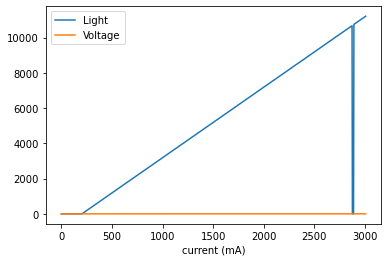

In [3]:
device.liv() # this plots Light vs Current and Voltage vs Current in one figure

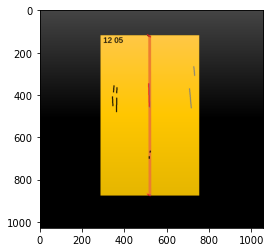

In [4]:
device.image() # this shows the device image C20F2A005C50-5_21-7.png

In [5]:
device.digit() # this shows the digit area image. See an example C20F2A005C50-5_21-7_digits.png

### 2. Credit card default case study (15-30 mins)

In [6]:
# Use the UCI_Credit_Card.csv to build a model, evaluate and present your model
# Note that the algorithm you selected and model performance is not important.You don't need to spend time tuning model

# classification using data set 
# Importing the required library 

import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Load data and columns
dataset = pd.read_csv('UCI_Credit_Card.csv')
data = dataset.iloc[:, :]

# Seperating the predicting column from the whole dataset 
X = data.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 

# Encoding the predicting variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Splitting the data into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Using the random forest classifier for the prediction 
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

# Printing the results 
print('Confusion Matrix :') 
print(confusion_matrix(y_test, predicted))
print('Accuracy Score :',accuracy_score(y_test, predicted)) 
print('Report : ') 
print(classification_report(y_test, predicted)) 

Confusion Matrix :
[[6694  366]
 [1232  708]]
Accuracy Score : 0.8224444444444444
Report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.66      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### 3. The tower of Hanoi problem: If you have more time, please write code to solve the problem.

The Tower of Hanoi (also called the Tower of Brahma or Lucas' Tower[1] and sometimes pluralized as Towers) is a mathematical game or puzzle. It consists of three rods and a number of disks of different sizes, which can slide onto any rod. The puzzle starts with the disks in a neat stack in ascending order of size on one rod, the smallest at the top, thus making a conical shape.

The objective of the puzzle is to move the entire stack to another rod, obeying the following simple rules:

Only one disk can be moved at a time.
Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.
No larger disk may be placed on top of a smaller disk.
With 3 disks, the puzzle can be solved in 7 moves. The minimal number of moves required to solve a Tower of Hanoi puzzle is 2n − 1, where n is the number of disks.
